## Writing it to file

In [108]:
def write_to_file(folder_name,lst):
    a = 1
    for lines in lst:
        f = open(folder_name+"/quote"+str(a)+".txt","w") 
        f.write(lines)
        f.close()
        a = a+1

## Removing stopwords from the dataset

In [109]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [110]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def remove_stop_word(lst):
    stop_words = set(stopwords.words('english')) 
    lst_removed_stop_word = []

    for lines in lst:
        word_tokens = word_tokenize(lines) 

        filtered_sentence = [w for w in word_tokens if not w in stop_words] 

        filtered_sentence = [] 

        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 

        lst_removed_stop_word.append(" ".join(str(x) for x in filtered_sentence))
    return lst_removed_stop_word

## Removing Punctuation from the dataset

In [111]:
from nltk.tokenize import RegexpTokenizer

def remove_punctuation(lst_input):
    lst_removed_stop_word_punctuation = []
    tokenizer = RegexpTokenizer(r'\w+')
    for lst in lst_input:
        lst_removed_stop_word_punctuation.append(" ".join(str(x.lower()) for x in tokenizer.tokenize(lst)))
    return lst_removed_stop_word_punctuation

## Term frequency matrix

In [112]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from tabulate import tabulate

def create_term_frequency_matrix(lst):
    vec = CountVectorizer()
    X = vec.fit_transform(lst)
    df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
    return df

In [113]:
def create_label(a):
    return [a for i in range(0,20)]

### Converting sigmoid output to binary number by setting the threshold as 0.6 i.e Values > 0.6 will belong to class 1 and less than 0.6 will belong to class 0

In [114]:
def set_threshold(lst):
    lst_abc = [] 
    for i, predicted in enumerate(lst):
        if predicted[0] > 0.6:
            lst_abc.append(1)
        else:
            lst_abc.append(0)
    return lst_abc;

## Creating dataset for Demotivation Lines

In [115]:
lst = ["Try & try until you cannot succeed","Happy people do not wake up for breakfast","Life is only logical, and to think it's a gift is depressing", "Accept that you're just a product, not a gift", "There are no stupid questions, but there are a LOT of inquisitive idiots", "The United States was a big country where everybody wore funny t-shirts and ate too much","Those who doubt your ability probably have a valid reason", "The best things in life are actually really expensive", "Dream is the only way for you to escape the miserable reality of your life","If at first you don’t succeed. Give up and try something else","Always believe that something wonderful will probably never happen","You can be replaced","It probably will get worse","You’re born, you work, you die","Don’t think yourself as an ugly person. Think yourself as a beautiful monkey","Everything happens for a reasons. Sometimes the reason is that you’re stupid and make bad decisions","Always remember you’re someone’s reason to smile because you’re a joke","The first step towards failure is trying","Dream Big, Set Goals. Write goals on a nice paper and never look at them again","The longer you wait, the more comfortable you can make yourself."]
lst

['Try & try until you cannot succeed',
 'Happy people do not wake up for breakfast',
 "Life is only logical, and to think it's a gift is depressing",
 "Accept that you're just a product, not a gift",
 'There are no stupid questions, but there are a LOT of inquisitive idiots',
 'The United States was a big country where everybody wore funny t-shirts and ate too much',
 'Those who doubt your ability probably have a valid reason',
 'The best things in life are actually really expensive',
 'Dream is the only way for you to escape the miserable reality of your life',
 'If at first you don’t succeed. Give up and try something else',
 'Always believe that something wonderful will probably never happen',
 'You can be replaced',
 'It probably will get worse',
 'You’re born, you work, you die',
 'Don’t think yourself as an ugly person. Think yourself as a beautiful monkey',
 'Everything happens for a reasons. Sometimes the reason is that you’re stupid and make bad decisions',
 'Always remember y

### writing demotivational quotes to file

In [116]:
write_to_file("demotivational", lst)

### Removing the stop words from demotivational quotes

In [117]:
demotivate_stop_words = remove_stop_word(lst)
demotivate_stop_words

['Try & try succeed',
 'Happy people wake breakfast',
 "Life logical , think 's gift depressing",
 "Accept 're product , gift",
 'There stupid questions , LOT inquisitive idiots',
 'The United States big country everybody wore funny t-shirts ate much',
 'Those doubt ability probably valid reason',
 'The best things life actually really expensive',
 'Dream way escape miserable reality life',
 'If first don’t succeed . Give try something else',
 'Always believe something wonderful probably never happen',
 'You replaced',
 'It probably get worse',
 'You’re born , work , die',
 'Don’t think ugly person . Think beautiful monkey',
 'Everything happens reasons . Sometimes reason you’re stupid make bad decisions',
 'Always remember you’re someone’s reason smile you’re joke',
 'The first step towards failure trying',
 'Dream Big , Set Goals . Write goals nice paper never look',
 'The longer wait , comfortable make .']

### Removing punctuation from demotivational quotes

In [118]:
demotivate_stop_words_punctiation = remove_punctuation(demotivate_stop_words)
Y_demotivate = create_label(0)
demotivate_stop_words_punctiation

['try try succeed',
 'happy people wake breakfast',
 'life logical think s gift depressing',
 'accept re product gift',
 'there stupid questions lot inquisitive idiots',
 'the united states big country everybody wore funny t shirts ate much',
 'those doubt ability probably valid reason',
 'the best things life actually really expensive',
 'dream way escape miserable reality life',
 'if first don t succeed give try something else',
 'always believe something wonderful probably never happen',
 'you replaced',
 'it probably get worse',
 'you re born work die',
 'don t think ugly person think beautiful monkey',
 'everything happens reasons sometimes reason you re stupid make bad decisions',
 'always remember you re someone s reason smile you re joke',
 'the first step towards failure trying',
 'dream big set goals write goals nice paper never look',
 'the longer wait comfortable make']

## Creating dataset for Motivational Quotes

In [119]:
lst_motivate = ["If you can dream it, you can do it.","The Way Get Started Is To Quit Talking And Begin Doing.","Don’t Let Yesterday Take Up Too Much Of Today.","Failure Will Never Overtake Me If My Determination To Succeed Is Strong Enough.","We Generate Fears While We Sit. We Overcome Them By Action.","The Man Who Has Confidence In Himself Gains The Confidence Of Others.","Creativity Is Intelligence Having Fun.","What You Lack In Talent Can Be Made Up With Desire, Hustle And Giving 110% All The Time.","Develop An ‘Attitude Of Gratitude’. Say Thank You To Everyone You Meet For Everything They Do For You.","You Are Never Too Old To Set Another Goal Or To Dream A New Dream.","Fake It Until You Make It! Act As If You Had All The Confidence You Require Until It Becomes Your Reality.","For Every Reason It’s Not Possible, There Are Hundreds Of People Who Have Faced The Same Circumstances And Succeeded.","oday’s Accomplishments Were Yesterday’s Impossibilities.","The Only Way To Do Great Work Is To Love What You Do. If You Haven’t Found It Yet, Keep Looking. Don’t Settle.","You Don’t Have To Be Great To Start, But You Have To Start To Be Great.","There Are No Limits To What You Can Accomplish, Except The Limits You Place On Your Own Thinking.","Leadership Is The Ability To Get Extraordinary Achievement From Ordinary People","Leaders Set High Standards. Refuse To Tolerate Mediocrity Or Poor Performance","Leaders Think And Talk About The Solutions. Followers Think And Talk About The Problems.","Leaders Never Use The Word Failure. They Look Upon Setbacks As Learning Experiences."]
lst_motivate

['If you can dream it, you can do it.',
 'The Way Get Started Is To Quit Talking And Begin Doing.',
 'Don’t Let Yesterday Take Up Too Much Of Today.',
 'Failure Will Never Overtake Me If My Determination To Succeed Is Strong Enough.',
 'We Generate Fears While We Sit. We Overcome Them By Action.',
 'The Man Who Has Confidence In Himself Gains The Confidence Of Others.',
 'Creativity Is Intelligence Having Fun.',
 'What You Lack In Talent Can Be Made Up With Desire, Hustle And Giving 110% All The Time.',
 'Develop An ‘Attitude Of Gratitude’. Say Thank You To Everyone You Meet For Everything They Do For You.',
 'You Are Never Too Old To Set Another Goal Or To Dream A New Dream.',
 'Fake It Until You Make It! Act As If You Had All The Confidence You Require Until It Becomes Your Reality.',
 'For Every Reason It’s Not Possible, There Are Hundreds Of People Who Have Faced The Same Circumstances And Succeeded.',
 'oday’s Accomplishments Were Yesterday’s Impossibilities.',
 'The Only Way To D

### writing motivational quotes to file

In [120]:
write_to_file("motivational", lst_motivate)

### Removing the stop words from motivational quotes

In [121]:
motivate_stop_words = remove_stop_word(lst_motivate)
motivate_stop_words

['If dream , .',
 'The Way Get Started Is To Quit Talking And Begin Doing .',
 'Don’t Let Yesterday Take Up Too Much Of Today .',
 'Failure Will Never Overtake Me If My Determination To Succeed Is Strong Enough .',
 'We Generate Fears While We Sit . We Overcome Them By Action .',
 'The Man Who Has Confidence In Himself Gains The Confidence Of Others .',
 'Creativity Is Intelligence Having Fun .',
 'What You Lack In Talent Can Be Made Up With Desire , Hustle And Giving 110 % All The Time .',
 'Develop An ‘Attitude Of Gratitude’ . Say Thank You To Everyone You Meet For Everything They Do For You .',
 'You Are Never Too Old To Set Another Goal Or To Dream A New Dream .',
 'Fake It Until You Make It ! Act As If You Had All The Confidence You Require Until It Becomes Your Reality .',
 'For Every Reason It’s Not Possible , There Are Hundreds Of People Who Have Faced The Same Circumstances And Succeeded .',
 'oday’s Accomplishments Were Yesterday’s Impossibilities .',
 'The Only Way To Do Gre

### Removing punctuation from motivational quotes

In [122]:
motivate_stop_words_punctiation = remove_punctuation(motivate_stop_words)
Y_motivate = create_label(1)
motivate_stop_words_punctiation

['if dream',
 'the way get started is to quit talking and begin doing',
 'don t let yesterday take up too much of today',
 'failure will never overtake me if my determination to succeed is strong enough',
 'we generate fears while we sit we overcome them by action',
 'the man who has confidence in himself gains the confidence of others',
 'creativity is intelligence having fun',
 'what you lack in talent can be made up with desire hustle and giving 110 all the time',
 'develop an attitude of gratitude say thank you to everyone you meet for everything they do for you',
 'you are never too old to set another goal or to dream a new dream',
 'fake it until you make it act as if you had all the confidence you require until it becomes your reality',
 'for every reason it s not possible there are hundreds of people who have faced the same circumstances and succeeded',
 'oday s accomplishments were yesterday s impossibilities',
 'the only way to do great work is to love what you do if you have

## Creating X label and Y label for motivational and demotivational quote

In [123]:
import numpy as np

X = np.concatenate((demotivate_stop_words_punctiation, motivate_stop_words_punctiation), axis =0)
Y = np.concatenate((Y_demotivate, Y_motivate), axis =0)

## Term Frequency Matrix

In [124]:
df = create_term_frequency_matrix(X)
X = df.values
df

,110,ability,about,accept,accomplish,accomplishments,achievement,act,action,actually,...,wonderful,word,wore,work,worse,write,yesterday,yet,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [126]:
X_train.shape

(30, 231)

## Creating a Classification model using Keras

In [127]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [128]:
def base_model(node):
    model = Sequential()
    model.add(Dense(node, input_shape=(231,), activation  = 'relu'))
    model.add(Dense(1, activation  = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['acc'])
    return model

In [129]:
lst_nodes = [8,16,32,64,128,256,512,1028]
lst_model = []
from sklearn.metrics import accuracy_score
for values in lst_nodes:
    lst_model.append(base_model(values))

In [130]:
training_accuracy = []
testing_accuracy = []
parameter_learned = []
for model in lst_model:
    model.fit(X_train, y_train, epochs = 100)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    training_accuracy.append(accuracy_score(y_train, set_threshold(y_train_pred)))
    testing_accuracy.append(accuracy_score(y_test, set_threshold(y_test_pred)))
    parameter_learned.append(model.count_params())

Epoch 1/100
30/30 [==============================] - 8s - loss: 0.7464 - acc: 0.5333
Epoch 2/100
30/30 [==============================] - 0s - loss: 0.7375 - acc: 0.5333
Epoch 3/100
30/30 [==============================] - 0s - loss: 0.7287 - acc: 0.6000
Epoch 4/100
30/30 [==============================] - 0s - loss: 0.7202 - acc: 0.6000
Epoch 5/100
30/30 [==============================] - 0s - loss: 0.7118 - acc: 0.6333
Epoch 6/100
30/30 [==============================] - 0s - loss: 0.7042 - acc: 0.6333
Epoch 7/100
30/30 [==============================] - 0s - loss: 0.6968 - acc: 0.6333
Epoch 8/100
30/30 [==============================] - 0s - loss: 0.6895 - acc: 0.6333
Epoch 9/100
30/30 [==============================] - 0s - loss: 0.6823 - acc: 0.6667
Epoch 10/100
30/30 [==============================] - 0s - loss: 0.6753 - acc: 0.6667
Epoch 11/100
30/30 [==============================] - 0s - loss: 0.6685 - acc: 0.7000
Epoch 12/100
30/30 [==============================] - 0s - loss

30/30 [==============================] - 0s - loss: 0.2708 - acc: 1.0000
Epoch 97/100
30/30 [==============================] - 0s - loss: 0.2675 - acc: 1.0000
Epoch 98/100
30/30 [==============================] - 0s - loss: 0.2643 - acc: 1.0000
Epoch 99/100
30/30 [==============================] - 0s - loss: 0.2611 - acc: 1.0000
Epoch 100/100
30/30 [==============================] - 0s - loss: 0.2580 - acc: 1.0000
Epoch 1/100
30/30 [==============================] - 7s - loss: 0.6458 - acc: 0.6000
Epoch 2/100
30/30 [==============================] - 0s - loss: 0.6366 - acc: 0.6000
Epoch 3/100
30/30 [==============================] - 0s - loss: 0.6277 - acc: 0.6333
Epoch 4/100
30/30 [==============================] - 0s - loss: 0.6189 - acc: 0.6667
Epoch 5/100
30/30 [==============================] - 0s - loss: 0.6103 - acc: 0.7000
Epoch 6/100
30/30 [==============================] - 0s - loss: 0.6018 - acc: 0.7333
Epoch 7/100
30/30 [==============================] - 0s - loss: 0.5933 -

30/30 [==============================] - 0s - loss: 0.1971 - acc: 1.0000
Epoch 92/100
30/30 [==============================] - 0s - loss: 0.1943 - acc: 1.0000
Epoch 93/100
30/30 [==============================] - 0s - loss: 0.1916 - acc: 1.0000
Epoch 94/100
30/30 [==============================] - 0s - loss: 0.1889 - acc: 1.0000
Epoch 95/100
30/30 [==============================] - 0s - loss: 0.1862 - acc: 1.0000
Epoch 96/100
30/30 [==============================] - 0s - loss: 0.1835 - acc: 1.0000
Epoch 97/100
30/30 [==============================] - 0s - loss: 0.1809 - acc: 1.0000
Epoch 98/100
30/30 [==============================] - 0s - loss: 0.1783 - acc: 1.0000
Epoch 99/100
30/30 [==============================] - 0s - loss: 0.1757 - acc: 1.0000
Epoch 100/100
30/30 [==============================] - 0s - loss: 0.1732 - acc: 1.0000
Epoch 1/100
30/30 [==============================] - 7s - loss: 0.6916 - acc: 0.6000
Epoch 2/100
30/30 [==============================] - 0s - loss: 0.6

30/30 [==============================] - 0s - loss: 0.1525 - acc: 1.0000
Epoch 87/100
30/30 [==============================] - 0s - loss: 0.1494 - acc: 1.0000
Epoch 88/100
30/30 [==============================] - 0s - loss: 0.1464 - acc: 1.0000
Epoch 89/100
30/30 [==============================] - 0s - loss: 0.1435 - acc: 1.0000
Epoch 90/100
30/30 [==============================] - 0s - loss: 0.1406 - acc: 1.0000
Epoch 91/100
30/30 [==============================] - 0s - loss: 0.1378 - acc: 1.0000
Epoch 92/100
30/30 [==============================] - 0s - loss: 0.1351 - acc: 1.0000
Epoch 93/100
30/30 [==============================] - 0s - loss: 0.1323 - acc: 1.0000
Epoch 94/100
30/30 [==============================] - 0s - loss: 0.1297 - acc: 1.0000
Epoch 95/100
30/30 [==============================] - 0s - loss: 0.1271 - acc: 1.0000
Epoch 96/100
30/30 [==============================] - 0s - loss: 0.1246 - acc: 1.0000
Epoch 97/100
30/30 [==============================] - 0s - loss: 0.

30/30 [==============================] - 0s - loss: 0.0852 - acc: 1.0000
Epoch 82/100
30/30 [==============================] - 0s - loss: 0.0831 - acc: 1.0000
Epoch 83/100
30/30 [==============================] - 0s - loss: 0.0810 - acc: 1.0000
Epoch 84/100
30/30 [==============================] - 0s - loss: 0.0791 - acc: 1.0000
Epoch 85/100
30/30 [==============================] - 0s - loss: 0.0771 - acc: 1.0000
Epoch 86/100
30/30 [==============================] - 0s - loss: 0.0752 - acc: 1.0000
Epoch 87/100
30/30 [==============================] - 0s - loss: 0.0734 - acc: 1.0000
Epoch 88/100
30/30 [==============================] - 0s - loss: 0.0717 - acc: 1.0000
Epoch 89/100
30/30 [==============================] - 0s - loss: 0.0699 - acc: 1.0000
Epoch 90/100
30/30 [==============================] - 0s - loss: 0.0683 - acc: 1.0000
Epoch 91/100
30/30 [==============================] - 0s - loss: 0.0667 - acc: 1.0000
Epoch 92/100
30/30 [==============================] - 0s - loss: 0.

30/30 [==============================] - 0s - loss: 0.0479 - acc: 1.0000
Epoch 77/100
30/30 [==============================] - 0s - loss: 0.0465 - acc: 1.0000
Epoch 78/100
30/30 [==============================] - 0s - loss: 0.0451 - acc: 1.0000
Epoch 79/100
30/30 [==============================] - 0s - loss: 0.0438 - acc: 1.0000
Epoch 80/100
30/30 [==============================] - 0s - loss: 0.0425 - acc: 1.0000
Epoch 81/100
30/30 [==============================] - 0s - loss: 0.0413 - acc: 1.0000
Epoch 82/100
30/30 [==============================] - 0s - loss: 0.0401 - acc: 1.0000
Epoch 83/100
30/30 [==============================] - 0s - loss: 0.0390 - acc: 1.0000
Epoch 84/100
30/30 [==============================] - 0s - loss: 0.0379 - acc: 1.0000
Epoch 85/100
30/30 [==============================] - 0s - loss: 0.0368 - acc: 1.0000
Epoch 86/100
30/30 [==============================] - 0s - loss: 0.0358 - acc: 1.0000
Epoch 87/100
30/30 [==============================] - 0s - loss: 0.

30/30 [==============================] - 0s - loss: 0.0233 - acc: 1.0000
Epoch 72/100
30/30 [==============================] - 0s - loss: 0.0226 - acc: 1.0000
Epoch 73/100
30/30 [==============================] - 0s - loss: 0.0219 - acc: 1.0000
Epoch 74/100
30/30 [==============================] - 0s - loss: 0.0212 - acc: 1.0000
Epoch 75/100
30/30 [==============================] - 0s - loss: 0.0206 - acc: 1.0000
Epoch 76/100
30/30 [==============================] - 0s - loss: 0.0200 - acc: 1.0000
Epoch 77/100
30/30 [==============================] - 0s - loss: 0.0194 - acc: 1.0000
Epoch 78/100
30/30 [==============================] - 0s - loss: 0.0189 - acc: 1.0000
Epoch 79/100
30/30 [==============================] - 0s - loss: 0.0183 - acc: 1.0000
Epoch 80/100
30/30 [==============================] - 0s - loss: 0.0178 - acc: 1.0000
Epoch 81/100
30/30 [==============================] - 0s - loss: 0.0173 - acc: 1.0000
Epoch 82/100
30/30 [==============================] - 0s - loss: 0.

30/30 [==============================] - 0s - loss: 0.0117 - acc: 1.0000
Epoch 67/100
30/30 [==============================] - 0s - loss: 0.0113 - acc: 1.0000
Epoch 68/100
30/30 [==============================] - 0s - loss: 0.0109 - acc: 1.0000
Epoch 69/100
30/30 [==============================] - 0s - loss: 0.0106 - acc: 1.0000
Epoch 70/100
30/30 [==============================] - 0s - loss: 0.0102 - acc: 1.0000
Epoch 71/100
30/30 [==============================] - 0s - loss: 0.0099 - acc: 1.0000
Epoch 72/100
30/30 [==============================] - 0s - loss: 0.0095 - acc: 1.0000
Epoch 73/100
30/30 [==============================] - 0s - loss: 0.0092 - acc: 1.0000
Epoch 74/100
30/30 [==============================] - 0s - loss: 0.0089 - acc: 1.0000
Epoch 75/100
30/30 [==============================] - 0s - loss: 0.0087 - acc: 1.0000
Epoch 76/100
30/30 [==============================] - 0s - loss: 0.0084 - acc: 1.0000
Epoch 77/100
30/30 [==============================] - 0s - loss: 0.

30/30 [==============================] - 0s - loss: 0.0056 - acc: 1.0000
Epoch 62/100
30/30 [==============================] - 0s - loss: 0.0054 - acc: 1.0000
Epoch 63/100
30/30 [==============================] - 0s - loss: 0.0052 - acc: 1.0000
Epoch 64/100
30/30 [==============================] - 0s - loss: 0.0050 - acc: 1.0000
Epoch 65/100
30/30 [==============================] - 0s - loss: 0.0048 - acc: 1.0000
Epoch 66/100
30/30 [==============================] - 0s - loss: 0.0047 - acc: 1.0000
Epoch 67/100
30/30 [==============================] - 0s - loss: 0.0045 - acc: 1.0000
Epoch 68/100
30/30 [==============================] - 0s - loss: 0.0043 - acc: 1.0000
Epoch 69/100
30/30 [==============================] - 0s - loss: 0.0042 - acc: 1.0000
Epoch 70/100
30/30 [==============================] - 0s - loss: 0.0041 - acc: 1.0000
Epoch 71/100
30/30 [==============================] - 0s - loss: 0.0039 - acc: 1.0000
Epoch 72/100
30/30 [==============================] - 0s - loss: 0.

In [131]:
print("Training accuracy " ,training_accuracy)
print("Testing accuracy " ,testing_accuracy)
print("Parameter learned ",parameter_learned)

Training accuracy  [0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Testing accuracy  [0.4, 0.5, 0.4, 0.5, 0.4, 0.3, 0.5, 0.4]
Parameter learned  [1865, 3729, 7457, 14913, 29825, 59649, 119297, 239525]


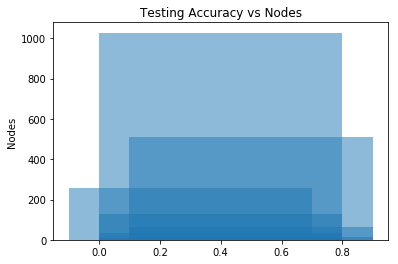

In [132]:
plt.bar(testing_accuracy,[8,16,32,64,128,256,512,1028],align='center', alpha=0.5)
plt.ylabel('Nodes')
plt.title('Testing Accuracy vs Nodes')
plt.show()

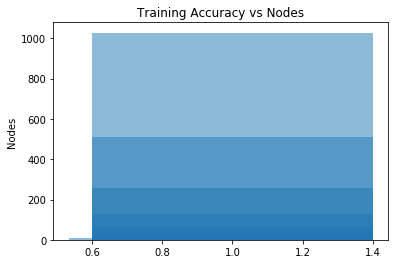

In [133]:
plt.bar(training_accuracy,[8,16,32,64,128,256,512,1028],align='center', alpha=0.5)
plt.ylabel('Nodes')
plt.title('Training Accuracy vs Nodes')
plt.show()

## Increasing number of Layers

In [134]:
training_accuracy_layers = []
testing_accuracy_layers = []
parameters_learned_layers = []

In [135]:
model1 = Sequential()
model1.add(Dense(32, input_shape=(231,), activation  = 'relu'))
model1.add(Dense(32, activation  = 'relu'))
model1.add(Dense(1, activation  = 'relu'))
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['acc'])
model1.fit(X_train, y_train, epochs = 100, verbose =1)
y_train_pred_layers = model1.predict(X_train)
y_test_pred_layers = model1.predict(X_test)
training_accuracy_layers.append(accuracy_score(y_train, set_threshold(y_train_pred)))
testing_accuracy_layers.append(accuracy_score(y_test, set_threshold(y_test_pred)))
parameters_learned_layers.append(model1.count_params())

Epoch 1/100
30/30 [==============================] - 9s - loss: 4.7593 - acc: 0.5667
Epoch 2/100
30/30 [==============================] - 0s - loss: 4.3099 - acc: 0.5667
Epoch 3/100
30/30 [==============================] - 0s - loss: 4.2092 - acc: 0.5667
Epoch 4/100
30/30 [==============================] - 0s - loss: 4.1568 - acc: 0.5667
Epoch 5/100
30/30 [==============================] - 0s - loss: 4.1202 - acc: 0.5667
Epoch 6/100
30/30 [==============================] - 0s - loss: 4.0909 - acc: 0.5667
Epoch 7/100
30/30 [==============================] - 0s - loss: 4.0678 - acc: 0.5667
Epoch 8/100
30/30 [==============================] - 0s - loss: 4.0482 - acc: 0.5667
Epoch 9/100
30/30 [==============================] - 0s - loss: 4.0314 - acc: 0.5667
Epoch 10/100
30/30 [==============================] - 0s - loss: 3.6728 - acc: 0.5667
Epoch 11/100
30/30 [==============================] - 0s - loss: 3.6092 - acc: 0.5667
Epoch 12/100
30/30 [==============================] - 0s - loss

30/30 [==============================] - 0s - loss: 0.0529 - acc: 0.9667
Epoch 97/100
30/30 [==============================] - 0s - loss: 0.0501 - acc: 0.9667
Epoch 98/100
30/30 [==============================] - 0s - loss: 0.0474 - acc: 0.9667
Epoch 99/100
30/30 [==============================] - 0s - loss: 0.0451 - acc: 0.9667
Epoch 100/100
30/30 [==============================] - 0s - loss: 0.0429 - acc: 0.9667


In [136]:
model2 = Sequential()
model2.add(Dense(32, input_shape=(231,), activation  = 'relu'))
model2.add(Dense(32, activation  = 'relu'))
model2.add(Dense(32, activation  = 'relu'))
model2.add(Dense(1, activation  = 'sigmoid'))
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['acc'])
model2.fit(X_train, y_train, epochs = 100, verbose =1)
y_train_pred_layers = model2.predict(X_train)
y_test_pred_layers = model2.predict(X_test)
training_accuracy_layers.append(accuracy_score(y_train, set_threshold(y_train_pred)))
testing_accuracy_layers.append(accuracy_score(y_test, set_threshold(y_test_pred)))
parameters_learned_layers.append(model2.count_params())

Epoch 1/100
30/30 [==============================] - 8s - loss: 0.7008 - acc: 0.4000
Epoch 2/100
30/30 [==============================] - 0s - loss: 0.6908 - acc: 0.4333
Epoch 3/100
30/30 [==============================] - 0s - loss: 0.6814 - acc: 0.5000
Epoch 4/100
30/30 [==============================] - 0s - loss: 0.6723 - acc: 0.5333
Epoch 5/100
30/30 [==============================] - 0s - loss: 0.6633 - acc: 0.5667
Epoch 6/100
30/30 [==============================] - 0s - loss: 0.6546 - acc: 0.7000
Epoch 7/100
30/30 [==============================] - 0s - loss: 0.6457 - acc: 0.9000
Epoch 8/100
30/30 [==============================] - 0s - loss: 0.6368 - acc: 0.9000
Epoch 9/100
30/30 [==============================] - 0s - loss: 0.6279 - acc: 0.8667
Epoch 10/100
30/30 [==============================] - 0s - loss: 0.6188 - acc: 0.9000
Epoch 11/100
30/30 [==============================] - 0s - loss: 0.6097 - acc: 0.9000
Epoch 12/100
30/30 [==============================] - 0s - loss

30/30 [==============================] - 0s - loss: 0.0060 - acc: 1.0000
Epoch 97/100
30/30 [==============================] - 0s - loss: 0.0058 - acc: 1.0000
Epoch 98/100
30/30 [==============================] - 0s - loss: 0.0056 - acc: 1.0000
Epoch 99/100
30/30 [==============================] - 0s - loss: 0.0054 - acc: 1.0000
Epoch 100/100
30/30 [==============================] - 0s - loss: 0.0052 - acc: 1.0000


In [137]:
model2 = Sequential()
model2.add(Dense(32, input_shape=(231,), activation  = 'relu'))
model2.add(Dense(32, activation  = 'relu'))
model2.add(Dense(32, activation  = 'relu'))
model2.add(Dense(32, activation  = 'relu'))
model2.add(Dense(1, activation  = 'sigmoid'))
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['acc'])
model2.fit(X_train, y_train, epochs = 100, verbose =1)
y_train_pred_layers = model2.predict(X_train)
y_test_pred_layers = model2.predict(X_test)
training_accuracy_layers.append(accuracy_score(y_train, set_threshold(y_train_pred)))
testing_accuracy_layers.append(accuracy_score(y_test, set_threshold(y_test_pred)))
parameters_learned_layers.append(model2.count_params())

Epoch 1/100
30/30 [==============================] - 9s - loss: 0.6885 - acc: 0.5667
Epoch 2/100
30/30 [==============================] - 0s - loss: 0.6817 - acc: 0.6000
Epoch 3/100
30/30 [==============================] - 0s - loss: 0.6749 - acc: 0.6000
Epoch 4/100
30/30 [==============================] - 0s - loss: 0.6680 - acc: 0.6000
Epoch 5/100
30/30 [==============================] - 0s - loss: 0.6611 - acc: 0.6000
Epoch 6/100
30/30 [==============================] - 0s - loss: 0.6539 - acc: 0.6000
Epoch 7/100
30/30 [==============================] - 0s - loss: 0.6464 - acc: 0.6000
Epoch 8/100
30/30 [==============================] - 0s - loss: 0.6388 - acc: 0.6000
Epoch 9/100
30/30 [==============================] - 0s - loss: 0.6310 - acc: 0.6000
Epoch 10/100
30/30 [==============================] - 0s - loss: 0.6229 - acc: 0.7000
Epoch 11/100
30/30 [==============================] - 0s - loss: 0.6142 - acc: 0.7000
Epoch 12/100
30/30 [==============================] - 0s - loss

30/30 [==============================] - 0s - loss: 0.0030 - acc: 1.0000
Epoch 97/100
30/30 [==============================] - 0s - loss: 0.0029 - acc: 1.0000
Epoch 98/100
30/30 [==============================] - 0s - loss: 0.0028 - acc: 1.0000
Epoch 99/100
30/30 [==============================] - 0s - loss: 0.0027 - acc: 1.0000
Epoch 100/100
30/30 [==============================] - 0s - loss: 0.0026 - acc: 1.0000


In [138]:
print(training_accuracy_layers)
print(testing_accuracy_layers)
print(parameters_learned_layers)

[1.0, 1.0, 1.0]
[0.4, 0.4, 0.4]
[8513, 9569, 10625]


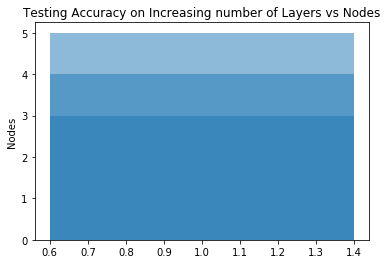

In [139]:
plt.bar(training_accuracy_layers,[3,4,5],align='center', alpha=0.5)
plt.ylabel('Nodes')
plt.title('Testing Accuracy on Increasing number of Layers vs Nodes')
plt.show()

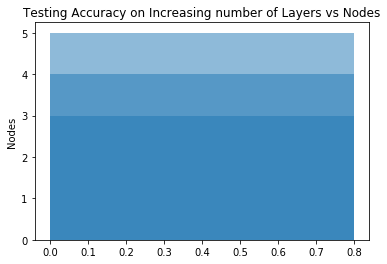

In [140]:
plt.bar(testing_accuracy_layers,[3,4,5],align='center', alpha=0.5)
plt.ylabel('Nodes')
plt.title('Testing Accuracy on Increasing number of Layers vs Nodes')
plt.show()